In [1]:
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [2]:
plt.style.use('fivethirtyeight')

In [ ]:
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

os.listdir(folder_path)

['arima_CH4.ipynb',
 'arima_CO.ipynb',
 'arima_CO2.ipynb',
 'arima_NO2.ipynb',
 'arima_no2.py',
 'arima_pm10.ipynb',
 'arima_pm25.ipynb',
 'arima_relative_humidity.ipynb',
 'arima_temp.ipynb',
 'datacoll.ipynb',
 'teststreamlit.py',
 'vayu.db',
 'vayu_Patna_dynamic_sensor_data_August_2024.csv',
 'vayu_Patna_dynamic_sensor_data_December_2024.csv',
 'vayu_Patna_dynamic_sensor_data_February_2025.csv',
 'vayu_Patna_dynamic_sensor_data_January_2025.csv',
 'vayu_Patna_dynamic_sensor_data_July_2024.csv',
 'vayu_Patna_dynamic_sensor_data_June_2024.csv',
 'vayu_Patna_dynamic_sensor_data_March_2025.csv',
 'vayu_Patna_dynamic_sensor_data_November_2024.csv',
 'vayu_Patna_dynamic_sensor_data_October_2024.csv',
 'vayu_Patna_dynamic_sensor_data_September_2024.csv']

In [12]:
color = sns.color_palette()
print('Please wait. Importing data...')
multi_df = []

# df = pd.read_csv("vayu_Patna_dynamic_sensor_data_March_2025.csv", encoding = "ISO-8859-1")


# Folder containing the CSV files
folder_path = "./"  # Replace with the path to your folder

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}...")
        df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed
        multi_df.append(df1)

# Combine all DataFrames into one
df = pd.concat(multi_df, ignore_index=True)

print('import completed.')

Please wait. Importing data...
Reading ./vayu_Patna_dynamic_sensor_data_August_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_December_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_February_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_January_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_July_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_June_2024.csv...


/tmp/ipykernel_43334/3742040145.py:16: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed


Reading ./vayu_Patna_dynamic_sensor_data_March_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_November_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_October_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_September_2024.csv...
import completed.


In [13]:
def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [14]:
df.head()

,id,device_name,lat,long,pm_25,pm_10,no2,co,co2,ch4,temp,rh,data_created_time
0,1394763,TARA101,25.586355,85.178223,29.4,55.8,14.37,1.48,NaN,NaN,36.8,57.0,2024-08-01 00:00:00+00:00
1,1394785,TARA070,25.598154,85.171898,15.0,20.3,972.01,NaN,611.0,NaN,34.6,63.0,2024-08-01 00:00:00+00:00
2,1394786,TARA082,25.640917,85.104034,15.6,15.6,101.67,NaN,1258.0,NaN,28.6,45.0,2024-08-01 00:00:00+00:00
3,1394793,TARA090,25.599537,85.177139,28.6,38.6,532.40,NaN,462.0,NaN,34.1,66.0,2024-08-01 00:00:00+00:00
4,1394809,TARA101,25.586355,85.178223,39.3,63.3,4.57,1.35,NaN,NaN,36.8,57.0,2024-08-01 00:01:00+00:00


In [ ]:
patna_data_ch4 = df[['data_created_time', 'ch4']]

In [17]:
patna_data_ch4.ch4.unique()

array([nan])

In [8]:
# patna_data = df[df.state == 'patna'].sort_values(by='date', ascending=0)
# patna_data_ch4 = df[['date', 'ch4']]
patna_data_ch4['ch4'] = patna_data_ch4['ch4'].map(lambda x: str(x))
patna_data_ch4 = patna_data_ch4[patna_data_ch4.ch4 != 'nan']
patna_data_ch4['ch4'] = pd.to_numeric(patna_data_ch4['ch4'])
patna_data_ch4['date'] = patna_data_ch4['data_created_time'].map(lambda x: str(x)[:10])
patna_data_ch4['date'] = patna_data_ch4['date'].map(lambda x: date_parser(x))
patna_data_ch4.index = patna_data_ch4['date']
patna_data_ch4 = patna_data_ch4.drop(['date'], axis=1)

/tmp/ipykernel_43334/3906841155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patna_data_ch4['ch4'] = patna_data_ch4['ch4'].map(lambda x: str(x))


In [9]:
patna_data_ch4.tail()

,data_created_time,ch4
date,,


In [10]:
patna_data_ch4 = patna_data_ch4.fillna(patna_data_ch4.bfill())
patna_data_ch4 = patna_data_ch4['ch4'].resample('D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

date
2024-06-07     55.553523
2024-06-08     83.790098
2024-06-09     82.606334
2024-06-10     74.508816
2024-06-11     76.819104
                 ...    
2025-03-14     74.443111
2025-03-15    111.193002
2025-03-16     44.664417
2025-03-17     70.540737
2025-03-18    361.894074
Freq: D, Name: no2, Length: 285, dtype: float64


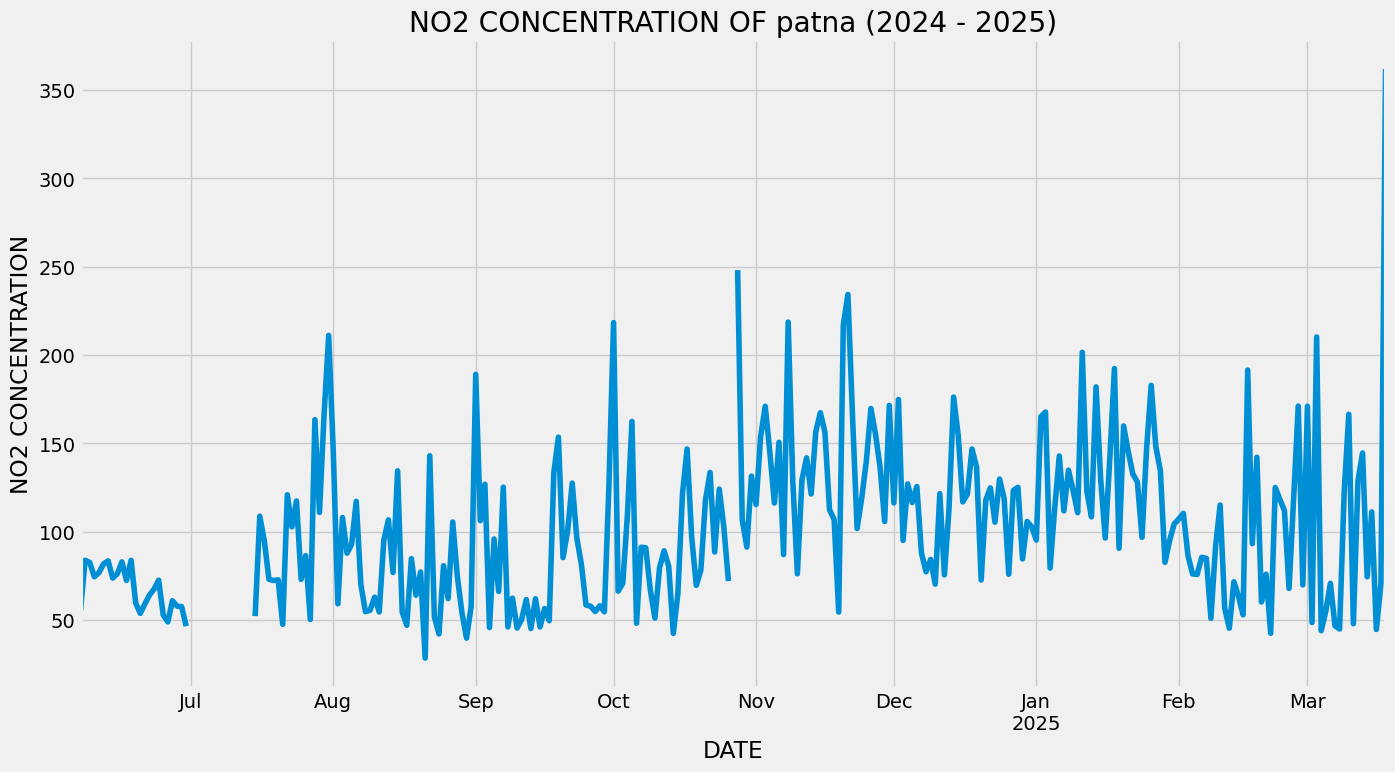

In [ ]:

print(patna_data_ch4)

patna_data_ch4.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("ch4 CONCENTRATION")
plt.title("ch4 CONCENTRATION OF patna (2024 - 2025)")
plt.show()

/home/deepesh/miniconda3/envs/myenv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


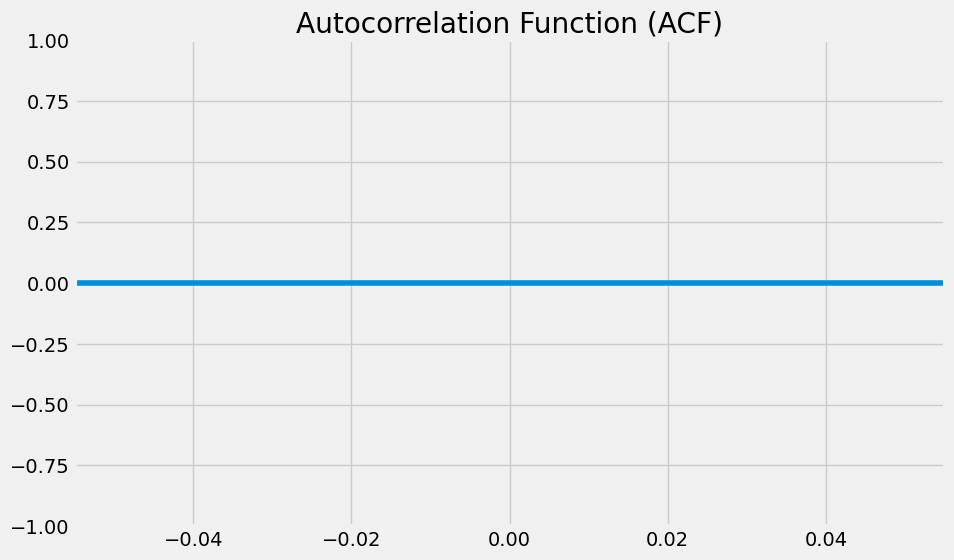

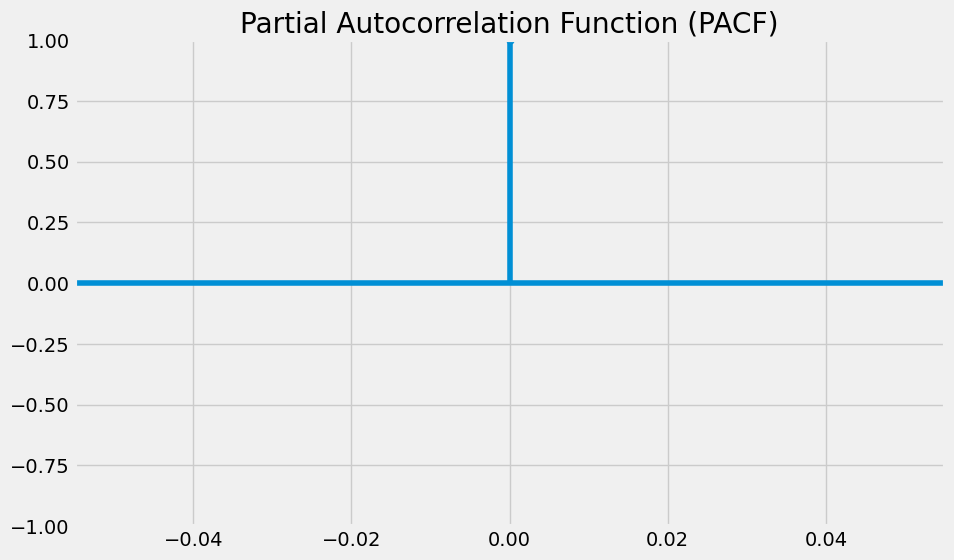

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(patna_data_ch4, lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(patna_data_ch4, lags=30, ax=plt.gca(), method='ywm')  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73059D+00    |proj g|=  4.15914D-01

At iterate    5    f=  4.68936D+00    |proj g|=  2.20522D-01


 This problem is unconstrained.



At iterate   10    f=  4.66963D+00    |proj g|=  2.27169D-01

At iterate   15    f=  4.65594D+00    |proj g|=  5.65889D-02

At iterate   20    f=  4.65546D+00    |proj g|=  2.60200D-02

At iterate   25    f=  4.65380D+00    |proj g|=  4.99465D-01

At iterate   30    f=  4.65100D+00    |proj g|=  1.03723D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   2.787D-05   4.651D+00
  F =   4.6509913417307747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

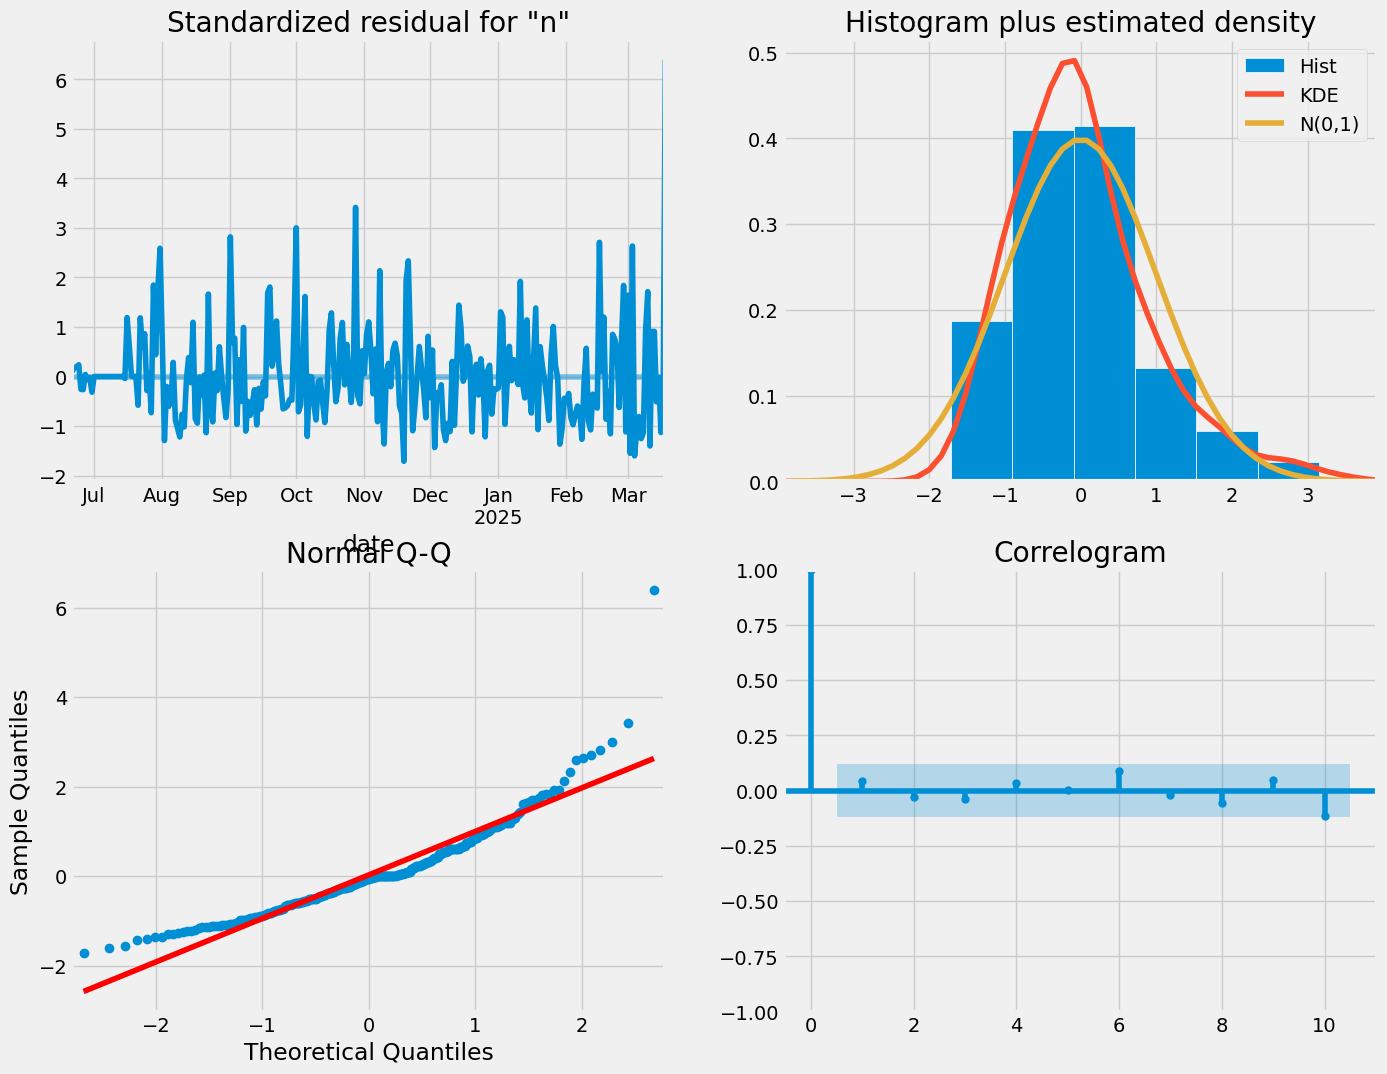

In [ ]:

mod = sm.tsa.statespace.SARIMAX(patna_data_ch4,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 160.5
2025-03-19    117.631446
2025-03-20    117.457523
2025-03-21    126.265402
2025-03-22    131.697038
2025-03-23    118.326023
2025-03-24    127.265548
2025-03-25    129.659679
2025-03-26    121.003910
2025-03-27    126.140956
2025-03-28    117.665408
2025-03-29    120.780428
2025-03-30    154.649943
2025-03-31    126.346263
2025-04-01    126.387888
2025-04-02    127.868661
2025-04-03    128.808522
2025-04-04    126.735786
2025-04-05    128.237786
2025-04-06    128.691101
2025-04-07    127.373997
Freq: D, Name: predicted_mean, dtype: float64


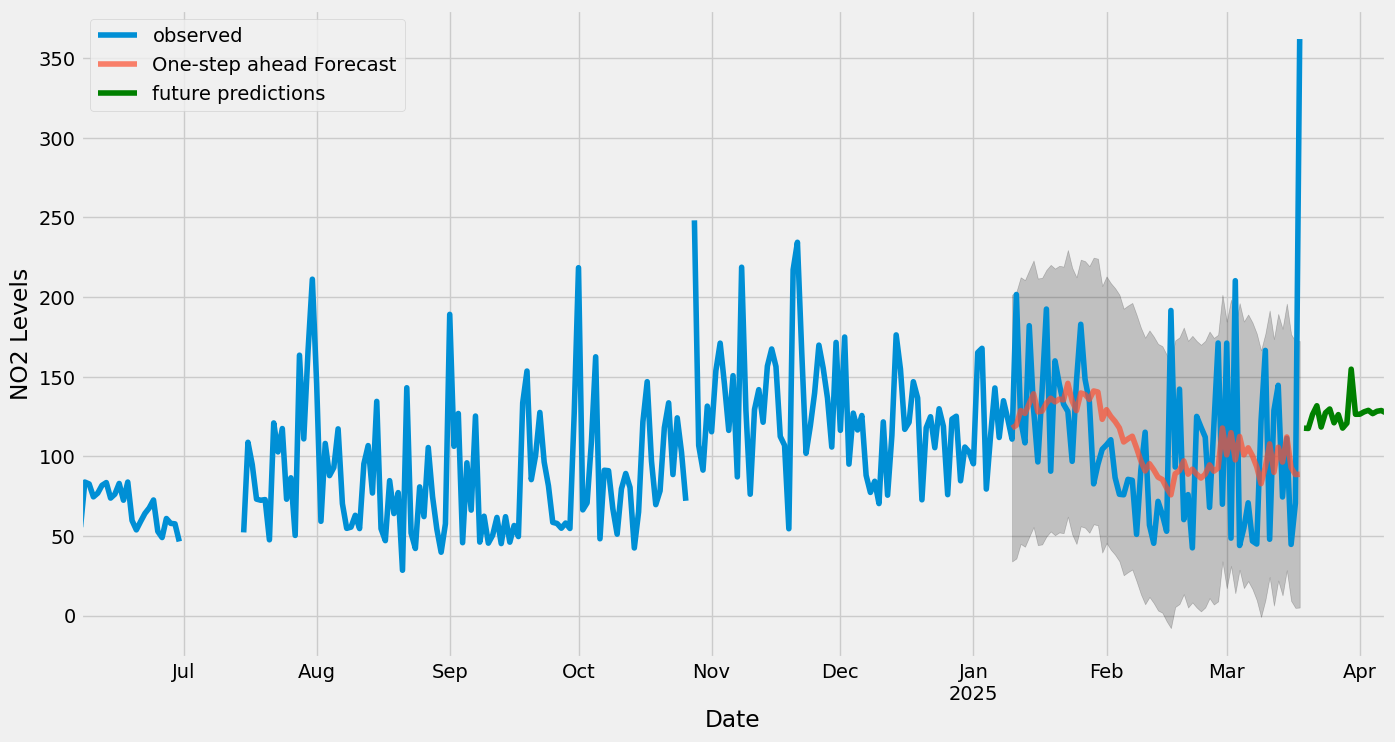

In [ ]:

pred = results.get_prediction(start=pd.to_datetime('2025-01-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = patna_data_ch4['2024':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('ch4 Levels')
plt.legend()


patna_data_ch4_forecasted = pred.predicted_mean
patna_data_ch4_truth = patna_data_ch4['2025-03-16':]

# Compute the mean square error
rmse = (((patna_data_ch4_forecasted - patna_data_ch4_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))

forecast = results.forecast(20)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.legend()
plt.show()